# Training PAL Algorithm

Set algorithm parameters

In [16]:
algorithm = 'PAL' # 'PAL' or 'MAL'

# maze parameters
maze_width = 17
maze_height = 17

# agent parameters
gamma = 0.995 # discount factor to compute expected cumulative reward
alpha = 0.01 # learning rate for policy improvment

# training parameters
n_environments = 50 # number of different environments to train on
max_iterations_per_environment = 10
n_episodes_per_iteration = 3 # number of episodes to run for each epoch
max_epochs_per_episode = 100
learning_rate = 0.1
epsilon = 0.1 # epsilon for epsilon-greedy policy

Start training

In [18]:
from train import main

main(
    algorithm=algorithm,
    learning_rate=learning_rate, 
    n_environments=n_environments,
    max_iterations_per_environment=max_iterations_per_environment,
    n_episodes_per_iteration=n_episodes_per_iteration, 
    max_epochs_per_episode=max_epochs_per_episode, 
    maze_width=maze_width, 
    maze_height=maze_height, 
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon,
    verbose=True
)


Initialize maze
Maze created
Maze size: 17x17
Compute initial and terminal state
Initial state: (1, 15)
Compute prior and transitional distribuitions
Compute reward function
Environment created
Agents initialized
Training started

Training on environment 1/50

Iteration 1/10 for environment 1
Collected 3 episodes
Model optimized and policy improved
Stackelberg-Nash equilibrium reached
Reset environment and initialize a new one

Initialize maze
Maze created
Maze size: 17x17
Compute initial and terminal state
Initial state: (1, 1)
Compute prior and transitional distribuitions
Compute reward function
Environment created

Training on environment 2/50

Iteration 1/10 for environment 2
Collected 3 episodes
Model optimized and policy improved
Stackelberg-Nash equilibrium reached
Reset environment and initialize a new one

Initialize maze
Maze created
Maze size: 17x17
Compute initial and terminal state
Initial state: (15, 15)
Compute prior and transitional distribuitions
Compute reward functi

Plot metrics

In [21]:
import matplotlib.pyplot as plt

def plot_metrics(mse, cost_function, algorithm, i):
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))

    ax[0].plot(mse)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('MSE')
    ax[0].set_title(f'MSE for {algorithm} for environment {i}')

    ax[1].plot(cost_function, 'r')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Cost function')
    ax[1].set_title(f'Cost function for {algorithm} for environment {i}')

    plt.show()

No metrics to plot for environment 1 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 2 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 3 only one iteration done
MSE: [-0.0003752393938914497]
Cost function: [-154.7490469896944]
No metrics to plot for environment 4 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 5 only one iteration done
MSE: [-0.01697980553960064]
Cost function: [-1012.2412744529358]
No metrics to plot for environment 6 only one iteration done
MSE: []
Cost function: []


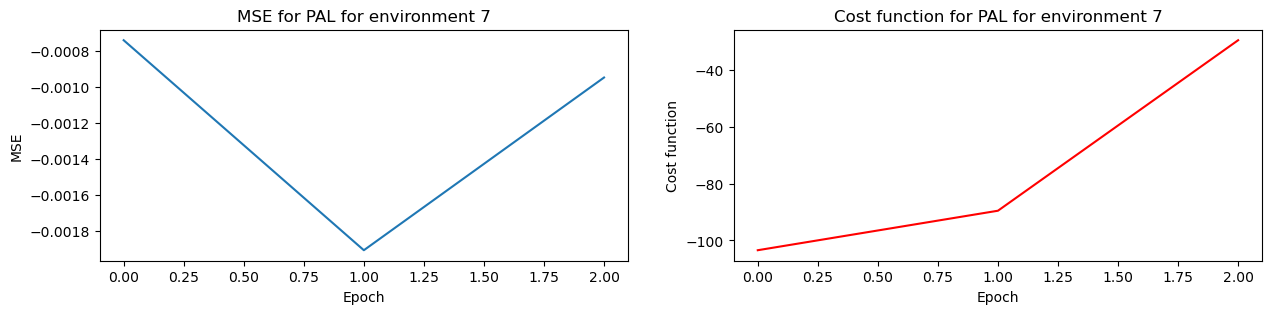

No metrics to plot for environment 8 only one iteration done
MSE: [-0.0002941440013878304]
Cost function: [-70.46371159623565]
No metrics to plot for environment 9 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 10 only one iteration done
MSE: [-0.019787080700678625]
Cost function: [-939.1308981087657]


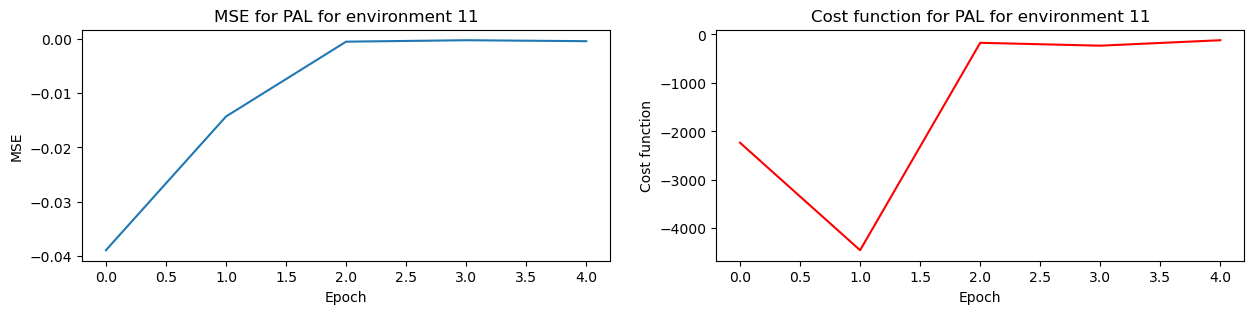

No metrics to plot for environment 12 only one iteration done
MSE: [-0.016818963164903233]
Cost function: [-1140.7523506988243]


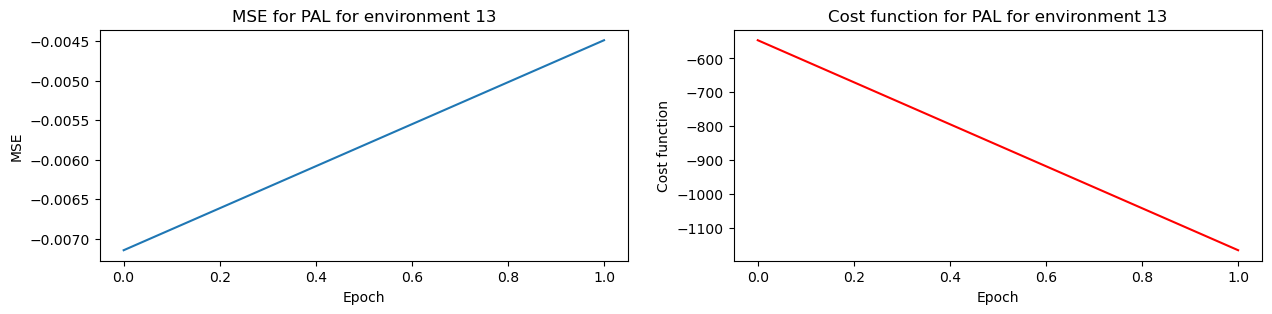

No metrics to plot for environment 14 only one iteration done
MSE: [-0.005832300387086529]
Cost function: [-443.0705038111772]
No metrics to plot for environment 15 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 16 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 17 only one iteration done
MSE: [-0.0004497226703550454]
Cost function: [-227.95060325074812]
No metrics to plot for environment 18 only one iteration done
MSE: []
Cost function: []


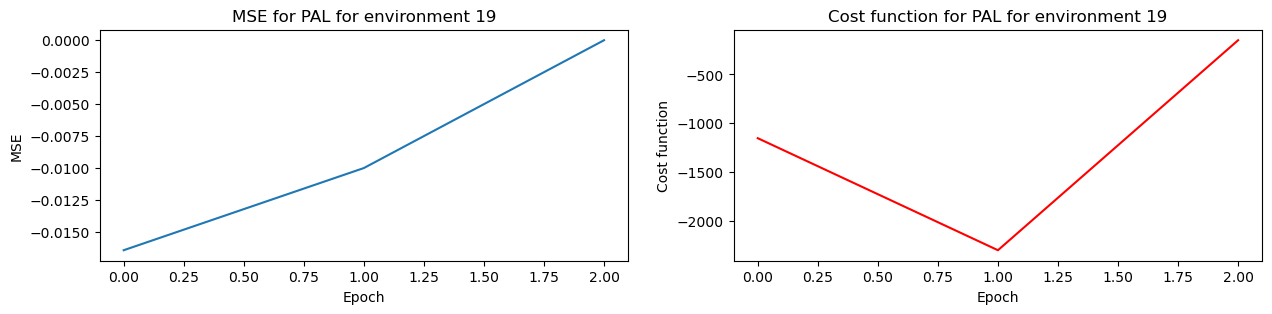

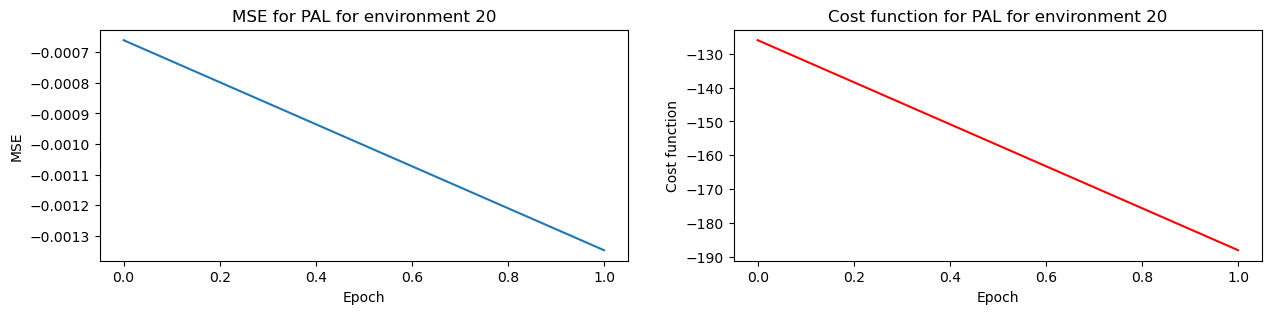

No metrics to plot for environment 21 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 22 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 23 only one iteration done
MSE: [-0.0006059418974536115]
Cost function: [-308.27057979007327]
No metrics to plot for environment 24 only one iteration done
MSE: [-0.00034815839473436314]
Cost function: [-162.1783865761635]
No metrics to plot for environment 25 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 26 only one iteration done
MSE: [-0.0002306056645881537]
Cost function: [-196.1396618015788]
No metrics to plot for environment 27 only one iteration done
MSE: [-0.0009322337627090507]
Cost function: [-250.55098525775375]
No metrics to plot for environment 28 only one iteration done
MSE: []
Cost function: []


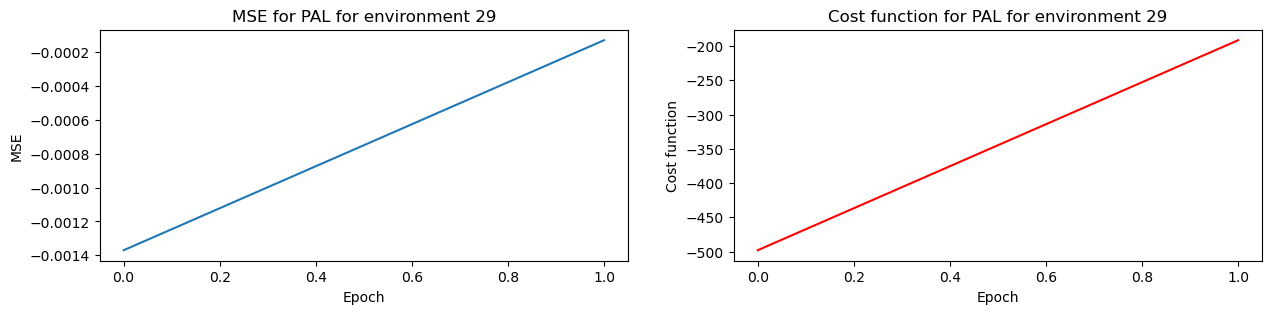

No metrics to plot for environment 30 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 31 only one iteration done
MSE: []
Cost function: []


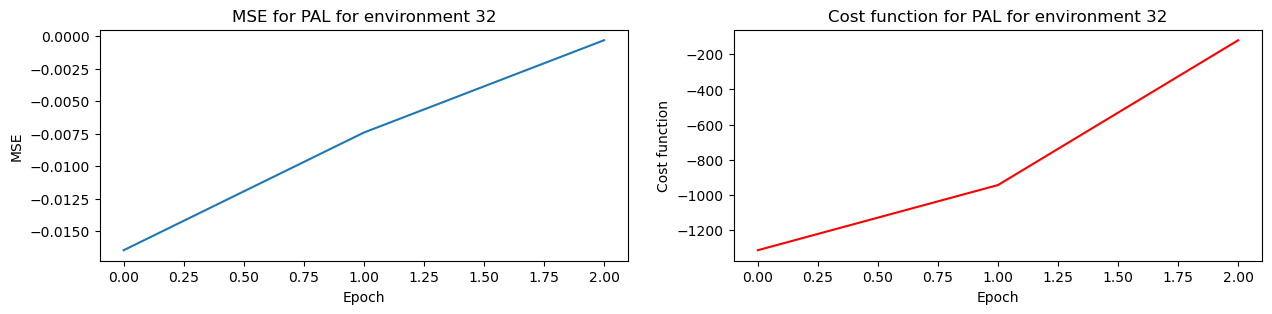

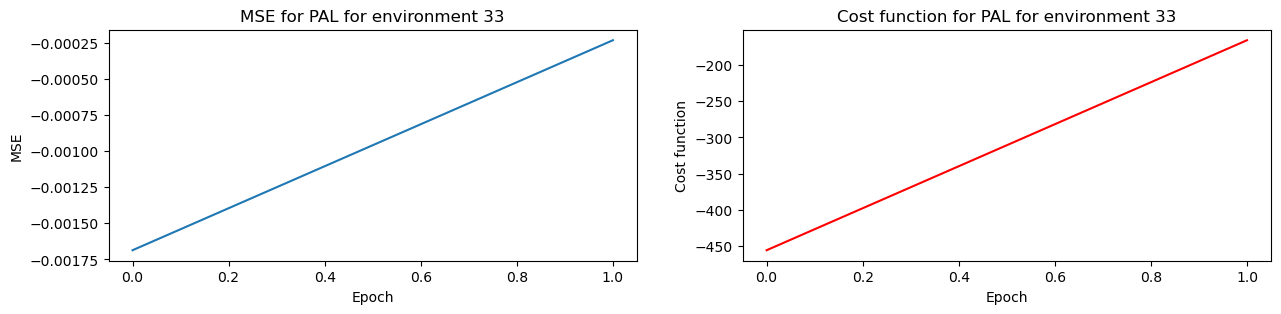

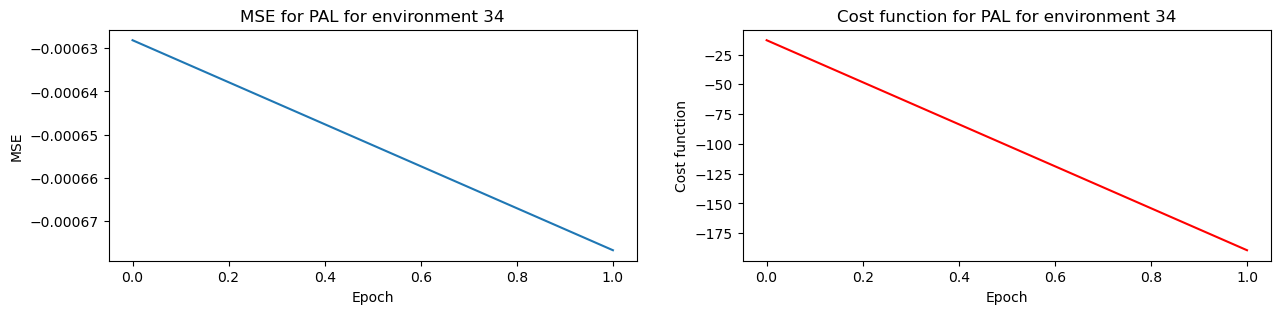

No metrics to plot for environment 35 only one iteration done
MSE: [-0.00043681814139488804]
Cost function: [-350.47547508788597]
No metrics to plot for environment 36 only one iteration done
MSE: [-0.00026295613616396054]
Cost function: [-280.0415797688012]


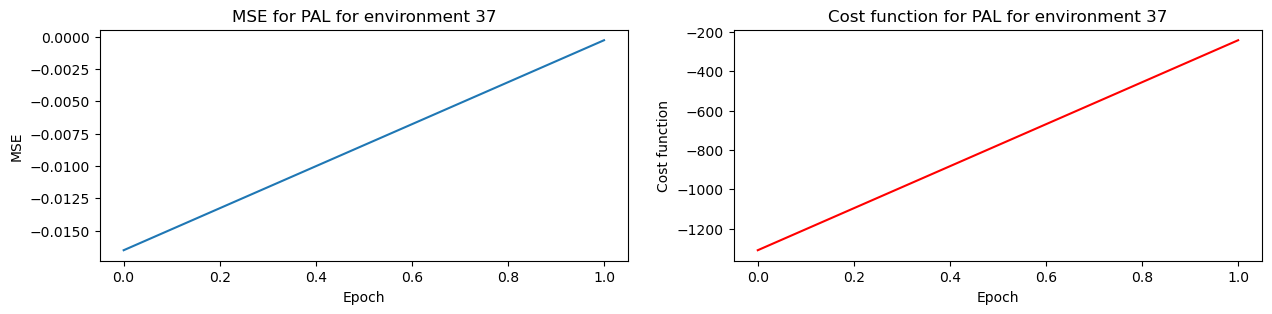

No metrics to plot for environment 38 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 39 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 40 only one iteration done
MSE: [-0.003583948796178163]
Cost function: [-487.78963014084115]
No metrics to plot for environment 41 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 42 only one iteration done
MSE: [-0.0003657346307578994]
Cost function: [-429.06541108724423]
No metrics to plot for environment 43 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 44 only one iteration done
MSE: [-0.039005051749539055]
Cost function: [-2333.0584971126223]
No metrics to plot for environment 45 only one iteration done
MSE: [-6.153234042553193e-05]
Cost function: [-54.530649159712276]
No metrics to plot for environment 46 only one iteration done
MSE: []
Cost function: []
No metrics to plot for environment 47 only one

In [22]:
import json
FOLDER = 'training_parameters/PAL/metrics'

all_cost_function = []
all_mse = []

for i in range(n_environments):
    PATH = FOLDER + '/metrics_env_' + str(i+1) + '.json'
    with open(PATH, 'r') as f:
        metrics = json.load(f)
    mse = metrics['mse']
    cost_function = metrics['cost_function']

    for j in mse:
        all_mse.append(j)
    for j in cost_function:
        all_cost_function.append(j)
        
    if len(mse) > 1:
        plot_metrics(mse, cost_function, algorithm, i+1)
    else:
        print(f'No metrics to plot for environment {i+1} only one iteration done')
        print('MSE:', mse)
        print('Cost function:', cost_function)


In [29]:
def plot_policy(policy, algorithm, i):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(policy, cmap='gray', vmin=0, vmax=1, origin='lower')
    ax.set_title(f'Policy for {algorithm} for environment {i}')
    plt.show()

def plot_mse(mse, algorithm):
    plt.figure(figsize=(15, 5))
    plt.plot(mse)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title(f'MSE for {algorithm}')
    plt.show

def plot_cost_function(cost_function, algorithm):
    plt.figure(figsize=(15, 5))
    plt.plot(cost_function, 'r')
    plt.xlabel('Epoch')
    plt.ylabel('Cost function')
    plt.title(f'Cost function for {algorithm}')
    plt.show()

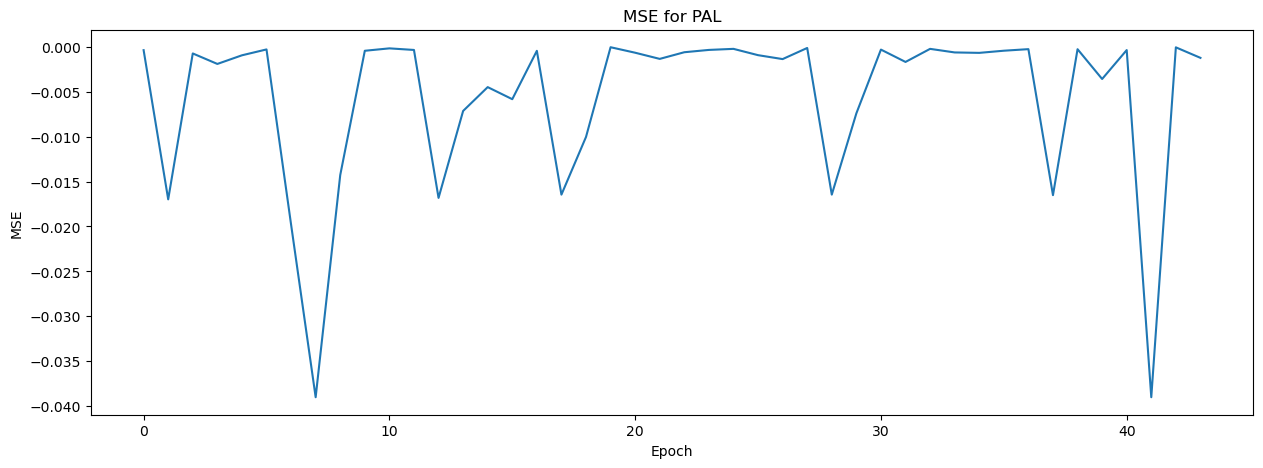

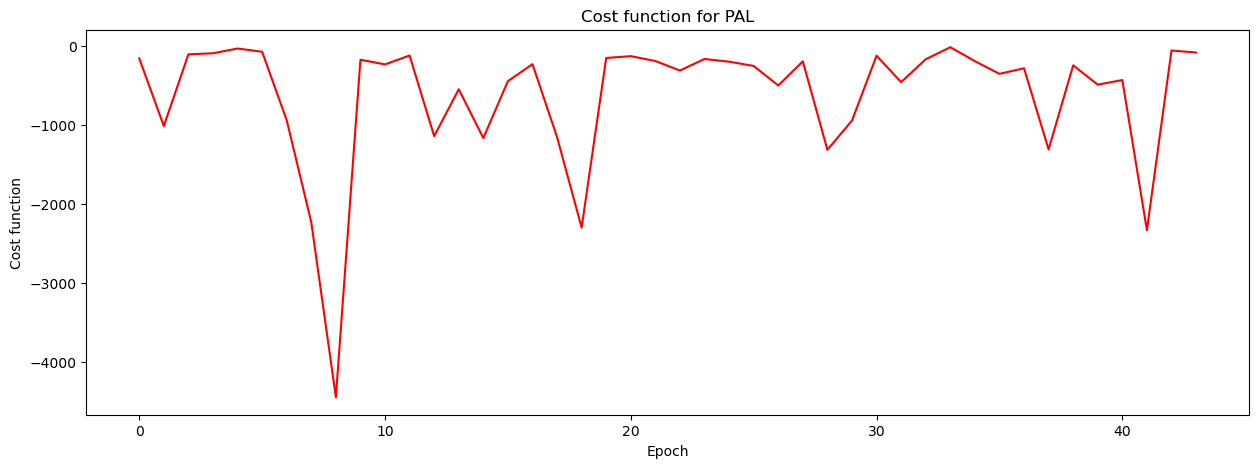

In [25]:
plot_mse(all_mse, algorithm)
plot_cost_function(all_cost_function, algorithm)

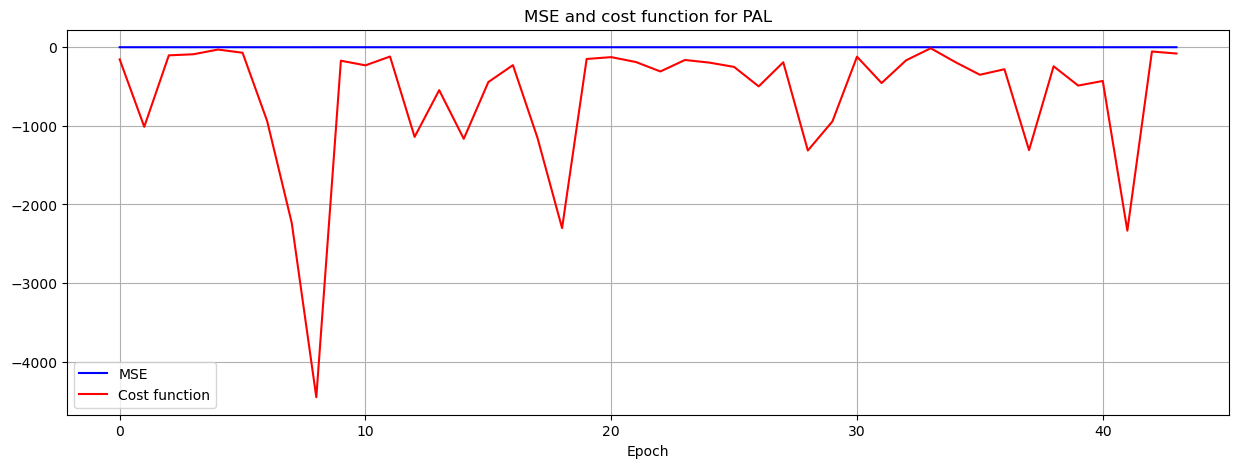

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(all_mse, '-b', label='MSE')
plt.plot(all_cost_function, '-r', label='Cost function')
plt.xlabel('Epoch')
plt.title(f'MSE and cost function for {algorithm}')
plt.legend()
plt.grid()
plt.show()

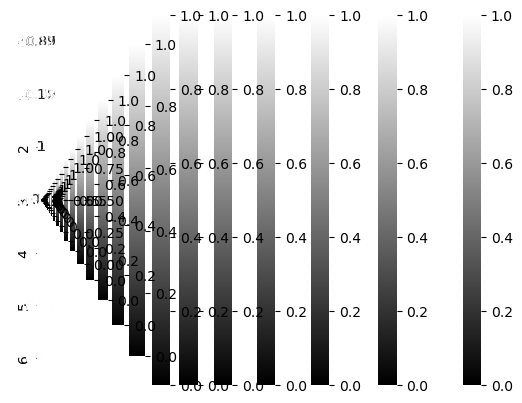

: 

In [33]:
FOLDER = 'training_parameters/PAL/policy'
import seaborn as sns

for i in range(50):
    PATH = FOLDER + '/policy_env_' + str(i) + '.json'
    with open(PATH, 'r') as f:
        policy = json.load(f)
    
    sns.heatmap(policy, cmap='gray', vmin=0, vmax=1, annot=True, cbar=True)
    plt.plot()